<a href="https://colab.research.google.com/github/GonzaloMA-17/RL_FJLGM/blob/main/notebook_tabulares_4x4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Asignatura**: Extensiones de Machine Learning, 2024/2025

**Alumnos**:<br>
- Gonzalo Marcos Andr√©s (gonzalo.marcosa@um.es)
- Francisco Jos√© L√≥pez Fern√°ndez (franciscojose.lopezf@um.es)

**M√°ster de Inteligencia Artificial**

| **Facultad de Inform√°tica** | **Universidad de Murcia** |
|-----------------------------|---------------------------|
| ![](https://www.um.es/image/layout_set_logo?img_id=175281&t=1726728636242) | ![](https://www.um.es/o/um-lr-principal-um-home-theme/images/logo-um.png) |


# **Pr√°ctica 2.  Aprendizaje en entornos complejos**

## **1. Preparaci√≥n del Entorno**

In [7]:
!  git clone https://github.com/GonzaloMA-17/RL_FJLGM.git

In [8]:
%cd RL_FJLGM

[Errno 2] No such file or directory: 'RL_FJLGM'
/content/RL_FJLGM


### 1.1 Introducci√≥n.  

Este notebook se enfoca en la implementaci√≥n y an√°lisis de un agente que utiliza **Aprendizaje por Refuerzo** para resolver distintos entornos que nos ofrece `gymnasium`.  

Los entornos que vamos a utlizar son:

 - **FrozenLake (4x4)**


### 1.2. Instalaci√≥n de Dependencias

Se instalan las librer√≠as necesarias para trabajar con el entorno de simulaci√≥n `gymnasium`, lo que permite crear un ambiente controlado donde el agente pueda interactuar y aprender. Este entorno simula una cuadr√≠cula donde el agente debe navegar para alcanzar una meta, mientras se enfrenta a varios desaf√≠os.

In [9]:
%%capture
# ! pip install 'gym[box2d]==0.20.0'
# ! pip install gymnasium[box2d]
# ! pip install "gymnasium[toy-text]
# ! pip install gymnasium
# ! pip install numpy
# ! pip install matplotlib
# ! pip install tqdm
# ! pip install torch

### 1.3 Librer√≠as

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import gymnasium as gym
import random

from src_agents import *
from src_plotting import *

### 1.4 Importaci√≥n de los Entornos

Se cargan dos entornos diferentes para el agente:
- **FrozenLake (4x4)** es un peque√±o lago congelado en el que el agente debe navegar para llegar a su destino, evitando caer en el agua. Este entorno es especialmente √∫til para un aprendizaje inicial, ya que no es resbaladizo, lo que facilita la comprensi√≥n de c√≥mo el agente interact√∫a con el entorno.

- **CliffWalking** el agente aqu√≠ debe caminar a lo largo de un acantilado, evitando caer en √©l. Este entorno introduce m√°s complejidad, ya que las acciones del agente tienen consecuencias m√°s dram√°ticas, como caer en el acantilado si no se tiene cuidado, lo que ofrece una mayor oportunidad para evaluar la capacidad del agente de aprender de los castigos y recompensas.



### 1.5 Funciones para Mostrar los Resultados
Se definen varias funciones para graficar y visualizar los resultados del entrenamiento del agente. Estas funciones permiten analizar el desempe√±o del agente en diferentes aspectos.
1.`plot(list_stats)`  
   - **Descripci√≥n**: Graficar√° la proporci√≥n de recompensas obtenidas en cada episodio del entrenamiento. Este gr√°fico proporciona una visualizaci√≥n clara del progreso del agente, mostrando c√≥mo mejora su desempe√±o a medida que avanza en el proceso de aprendizaje.

2. `plot_episode_lengths(episode_lengths, window=50)`  
   - **Descripci√≥n**: Graficar√° la longitud de los episodios en el entrenamiento, y calcular√° y mostrar√° la tendencia de las longitudes utilizando una media m√≥vil.

3. `plot_policy_blank(Q, env)`  
   - **Descripci√≥n**: Dibuja la pol√≠tica aprendida por el agente sobre un entorno vac√≠o, representando las acciones √≥ptimas en cada estado de la **Q-table** del agente con flechas (izquierda, abajo, derecha, arriba).

4. `plot_comparison(stats_list, labels, title="Comparaci√≥n de Resultados de Entrenamiento")`  
   - **Descripci√≥n**: Compara la evoluci√≥n de las recompensas obtenidas por diferentes algoritmos o agentes a lo largo del entrenamiento, permitiendo visualizar el rendimiento relativo de cada uno.

5. `plot_episode_lengths_comparison(episode_lengths_list, labels, window=50, title="Comparaci√≥n de Longitudes de Episodios")`  
   - **Descripci√≥n**: Compara las longitudes de los episodios de diferentes agentes, mostrando las longitudes y las tendencias de cada uno en subgr√°ficas separadas, con sombreado y media m√≥vil.

Todas las funciones y clases relacionadas con la visualizaci√≥n de gr√°ficos se encuentran en el archivo `src_agents/plotting.py`. Para utilizarlas, ser√° necesario importar las librer√≠as correspondientes desde esa ruta.

## **2. Dise√±o del Agente**

### 2.1 Estructura del Agente

Este es la estructura que contiene la implementaci√≥n de distintos agentes, organizados en m√≥dulos espec√≠ficos para facilitar su uso y mantenimiento.  

Cada agente hereda de una clase base (`agent.py`) y utiliza diferentes estrategias de aprendizaje, como **Monte Carlo**, **Q-Learning** y **SARSA**. Adem√°s, se incluyen m√≥dulos auxiliares para definir pol√≠ticas de exploraci√≥n y visualizar resultados.

```plaintext
|-- üìÇ src_agents                  # Carpeta principal que contiene los agentes de Aprendizaje por Refuerzo
|   |-- üìÑ __init__.py             # Archivo que convierte el directorio en un paquete de Python
|   |-- üìÑ agent.py                # Clase base para todos los agentes
|   |-- üìÑ monteCarloOnPolicy.py   # Implementaci√≥n del agente Monte Carlo On-Policy
|   |-- üìÑ monteCarloOffPolicy.py  # Implementaci√≥n del agente Monte Carlo Off-Policy
|   |-- üìÑ qLearning.py            # Implementaci√≥n del agente Q-Learning
|   |-- üìÑ sarsa.py                # Implementaci√≥n del agente SARSA
|   |-- üìÑ politicas.py            # Definici√≥n de pol√≠ticas de exploraci√≥n como epsilon-greedy y softmax
|   |-- üìÑ plotting.py             # Funciones de visualizaci√≥n de datos y gr√°ficos


El dise√±o del agente consta de dos partes.  

- Las pol√≠ticas (toma de decisiones) que realiza.
- El algoritmo con el que aprende.

### 2.2 Pol√≠ticas del Agente

- **Epsilon-soft**: Se define una pol√≠tica donde todas las acciones tienen una probabilidad de ser elegida.
   
- **Pol√≠tica epsilon-greedy**: basada en la pol√≠tica epsilon-soft. De esta forma el agente tiene una peque√±a probabilidad de explorar (tomar una acci√≥n aleatoria) y una mayor probabilidad de explotar (tomar la acci√≥n que considera mejor). Esto permite equilibrar la exploraci√≥n y la explotaci√≥n.  

- **Pol√≠tica greedy**: Es la usada una vez que "ha aprendido".  

### 2.3 Algoritmos


- **Tabulares**  
  - Monte Carlo On Policy  
  - Monte Carlo Off Policy  
  - SARSA
  - Q - Learning

- **Control con Aproximaciones**
  - SARSA semigradiente
  - Deep Q - Learning


## **3. Experimentaci√≥n - Frozen Lake**

FrozenLake es un entorno de Aprendizaje por Refuerzo incluido en Gymnasium, en el que un agente debe aprender a desplazarse sobre una superficie helada para llegar a un objetivo sin caer en agujeros. Se representa como una cuadr√≠cula donde cada celda puede ser suelo firme, un agujero o la meta.

El agente puede moverse en cuatro direcciones: izquierda, derecha, arriba y abajo. En la versi√≥n est√°ndar del entorno, el hielo introduce un factor de aleatoriedad en los movimientos, lo que significa que el agente no siempre se desplaza en la direcci√≥n elegida. Sin embargo, en este caso **configuraremos el entorno sin deslizamiento**, lo que significa que el agente se mover√° exactamente en la direcci√≥n que elija sin desviaciones aleatorias. Esto hace que el problema sea m√°s determinista y permite un aprendizaje m√°s directo de las estrategias √≥ptimas.

El objetivo del agente es llegar a la casilla de meta desde la posici√≥n inicial sin caer en un agujero. Se utiliza un sistema de recompensas en el que el agente recibe una recompensa de 1 cuando alcanza la meta y 0 en cualquier otro caso. Al eliminar el deslizamiento, el agente puede aprender una pol√≠tica √≥ptima de manera m√°s eficiente, ya que sus acciones tienen consecuencias predecibles.

### 3.1 Monte Carlo On-Policy

Monte Carlo (MC) es un m√©todo de aprendizaje por refuerzo basado en la simulaci√≥n de episodios completos para actualizar la funci√≥n de valor de estado-acci√≥n $Q(s,a)$. En el enfoque **On-Policy**, seguimos una pol√≠tica de exploraci√≥n ($\epsilon$-greedy) y actualizamos $Q$ en funci√≥n de las recompensas obtenidas.

**Caracter√≠sticas clave del m√©todo Monte Carlo On-Policy**:

- Aprende a partir de episodios completos (del estado inicial al terminal).  
- La actualizaci√≥n de $Q(s,a)$ se realiza utilizando el retorno $G$, que es la recompensa acumulada futura descontada:

  $$
  G_t = R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \dots + \gamma^{T-t-1} R_T
  $$

- Utiliza un promedio incremental para actualizar $Q$, en lugar de una tasa de aprendizaje fija:

  $$
  Q(s,a) \leftarrow Q(s,a) + \frac{1}{N(s,a)} (G - Q(s,a))
  $$

  donde $N(s,a)$ es el n√∫mero de veces que se ha visitado el par $(s,a)$.  
- Sigue una estrategia **On-Policy**, lo que significa que la misma pol√≠tica utilizada para generar episodios tambi√©n se usa para mejorar $Q$.  

**Ecuaci√≥n de actualizaci√≥n de $Q(s,a)$:**
$$
Q(s,a) \leftarrow Q(s,a) + \alpha \cdot (G - Q(s,a))
$$

donde:  
- $G$ es el retorno acumulado desde el estado $s$ y la acci√≥n $a$.  
- $\alpha$ es un promedio incremental basado en el n√∫mero de visitas:  

  $$
  \alpha = \frac{1}{N(s,a)}
  $$

#### 3.1.1 Mapa 4x4

**Implementaci√≥n**  

En primer lugar, establecemos una semilla para la reproducibilidad del problema

In [11]:
seed_value = 1995
np.random.seed(seed_value)  # Establecer semilla de numpy
random.seed(seed_value)  # Establecer semilla de random

Se crea un entorno de FrozenLake 4x4 sin deslizamiento (``'is_slippery=False'``), lo que hace que el movimiento del agente sea determinista.

In [12]:
# Crear el entorno
env_mc_on_policy = gym.make("FrozenLake-v1", is_slippery=False, map_name="4x4", render_mode="ansi")

**Creaci√≥n del agente Monte Carlo On-Policy**

Ahora tenemos que instanciar el agente ``MonteCarloOnPolicy``, con las siguientes caracter√≠stica:

- ``epsilon=0.4``: Inicialmente, el agente explorar√° con una probabilidad del 40%.  

- ``gamma=1.0``: Se utiliza un factor de descuento completo, lo que significa que se consideran todas las recompensas futuras sin atenuaci√≥n.

- ``decay=True``: Permite que epsilon disminuya con el tiempo, lo que ayuda al agente a explotar m√°s a medida que aprende.

- ``num_episodios=50000``: El agente se entrena durante 50,000 episodios para garantizar un aprendizaje suficiente.


In [13]:
# Instanciamos el agente
agente_mc_on_policy = MonteCarloOnPolicy(env_mc_on_policy, epsilon=0.4, gamma=1.0, decay=True, num_episodios=50000)

Luego, se llama al m√©todo ``entrenar()``, que devuelve los siguientes resultados:  

- ``Q_mc_on_policy``: La Q-table entrenada.  

- ``stats_mc_on_policy``: Una lista con la recompensa media acumulada por episodio.  

- ``episode_lengths_mc_on_policy``: Una lista con la longitud de cada episodio.  

In [14]:
Q_mc_on_policy, stats_mc_on_policy, episode_lengths_mc_on_policy = agente_mc_on_policy.entrenar()

Entrenando: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50000/50000 [00:34<00:00, 1428.97episodio/s]


**Evaluaci√≥n de la pol√≠tica aprendida**  
Una vez entrenado el agente con el algoritmo Monte Carlo On-Policy, **es fundamental evaluar la pol√≠tica aprendida para comprobar su eficacia en la resoluci√≥n del entorno**. Para ello, se extrae la pol√≠tica √≥ptima a partir de la Q-table obtenida durante el entrenamiento.

- ``pi_star_from_Q()`` extrae la pol√≠tica √≥ptima a partir de la Q-table entrenada.

- ``actions_mc_on_policy`` contiene la secuencia de acciones √≥ptimas para resolver FrozenLake.

- La pol√≠tica √≥ptima representa la mejor estrategia aprendida por el agente para llegar a la meta.

In [15]:
pi_star_mc_on_policy, actions_mc_on_policy = pi_star_from_Q(env_mc_on_policy, Q_mc_on_policy)

**Conclusi√≥n**

Para evaluar de manera integral el desempe√±o del agente entrenado, es √∫til visualizar distintos aspectos clave de su aprendizaje.  

En esta secci√≥n, se presentar√° una funci√≥n que genera una figura con tres gr√°ficos principales:

- **Proporci√≥n de recompensas por episodio**, lo que permite observar c√≥mo evoluciona la capacidad del agente para alcanzar la meta a lo largo del entrenamiento.

- **Longitud de los episodios**, incluyendo una media m√≥vil para analizar la estabilidad del aprendizaje y la eficiencia del agente en la resoluci√≥n del entorno.

- **Pol√≠tica aprendida**, representada gr√°ficamente en el entorno de FrozenLake, donde se muestra la mejor acci√≥n aprendida mediante flechas direccionales.  

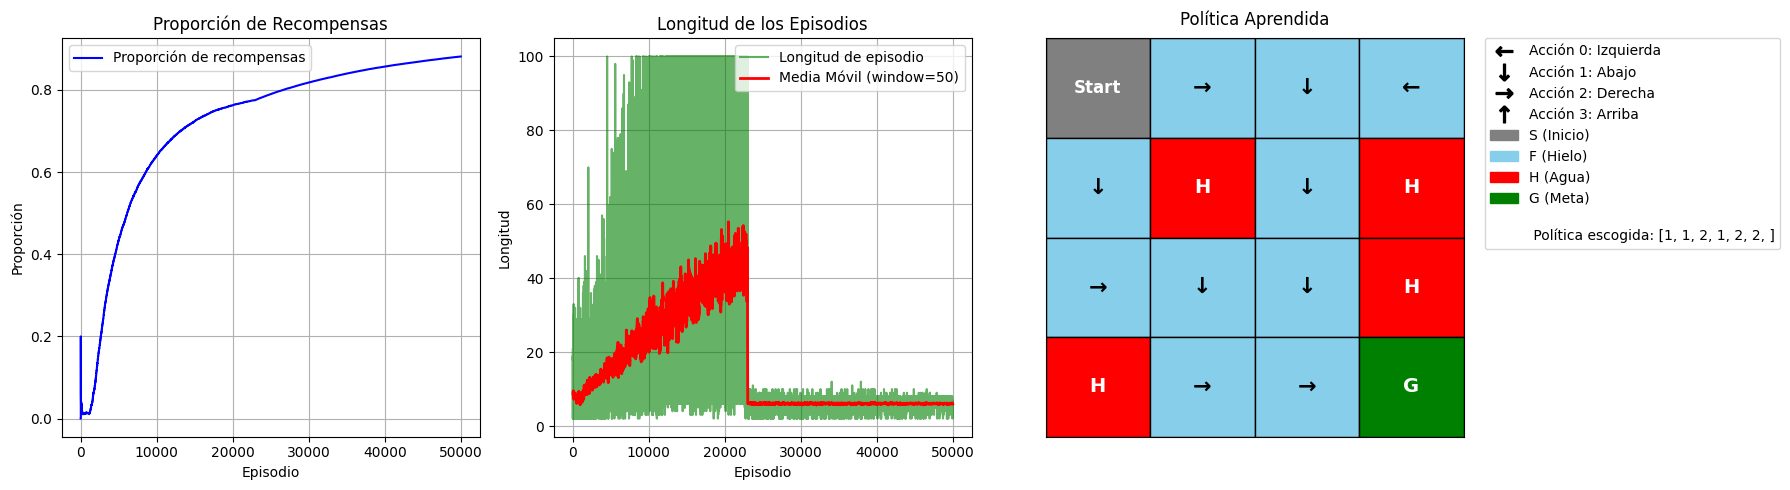

In [16]:
plot_all_three(
    list_stats=stats_mc_on_policy,
    episode_lengths=episode_lengths_mc_on_policy,
    Q=Q_mc_on_policy,
    env=env_mc_on_policy,
    actions=actions_mc_on_policy,
    window=50  # O el valor que quieras
)


En la gr√°fica de la **izquierda**, se muestra la **proporci√≥n de recompensas** obtenidas por episodio. Se observa una tendencia ascendente, lo que indica que el agente **mejora progresivamente su rendimiento**. Este resultado sugiere que la pol√≠tica aprendida es cada vez m√°s efectiva para maximizar las recompensas en el entorno.

En la gr√°fica **central**, se representa la **longitud de los episodios**. Al inicio del entrenamiento, la longitud de los episodios es muy variable y, en muchos casos, elevada (se toman m√°s pasos antes de terminar). Sin embargo, con el tiempo se aprecia una **disminuci√≥n y estabilizaci√≥n** de la duraci√≥n de los episodios, reforzada por la l√≠nea roja de media m√≥vil. Esto evidencia que el agente **aprende a resolver el entorno de forma m√°s eficiente**, reduciendo la cantidad de pasos necesarios para alcanzar un estado terminal (ya sea por caer en un agujero o llegar a la meta).

Por √∫ltimo, en la **derecha** se muestra la **pol√≠tica aprendida** en el tablero de *Frozen Lake*. Cada celda de tipo ‚ÄúF‚Äù (hielo seguro) contiene una flecha que indica la **acci√≥n √≥ptima** aprendida por el agente. Las celdas ‚ÄúH‚Äù (hoyo/agua) y ‚ÄúG‚Äù (meta) se marcan en rojo y verde, respectivamente, para se√±alar que son estados terminales. Este diagrama revela que la pol√≠tica aprendida evita las celdas ‚ÄúH‚Äù siempre que sea posible y traza un camino consistente hacia la meta ‚ÄúG‚Äù.  

En conjunto, los tres gr√°ficos confirman que:
1. El **rendimiento** del agente (proporci√≥n de recompensas) **aumenta** progresivamente.  
2. La **longitud de los episodios** **disminuye**, reflejando una **mayor eficiencia** en la toma de decisiones.  
3. La **pol√≠tica final** conduce al agente a **evitar los hoyos** y **alcanzar la meta** de manera consistente.  

Estos resultados evidencian que el agente ha **convergido** a una soluci√≥n razonable para la tarea de *FrozenLake*, aprendiendo a **maximizar recompensas** y **minimizar pasos** necesarios para completar cada episodio.

### 3.2 Monte Carlo Off-Policy

Monte Carlo (MC) es un m√©todo de aprendizaje por refuerzo basado en la simulaci√≥n de episodios completos para actualizar la funci√≥n de valor de estado-acci√≥n $Q(s,a)$. En la variante **Off-Policy**, la pol√≠tica que se utiliza para generar los episodios (pol√≠tica de comportamiento $b$) puede ser distinta de la pol√≠tica objetivo $\pi$ que deseamos aprender. Para corregir el sesgo introducido por el uso de diferentes pol√≠ticas, se emplea **Weighted Importance Sampling (WIS)**.

Caracter√≠sticas clave del m√©todo Monte Carlo Off-Policy:

- Uso de dos pol√≠ticas:

    - **Pol√≠tica de comportamiento ($b$)**: En este caso, es $\epsilon$-greedy respecto a la Q-table.  
    - **Pol√≠tica objetivo ($\pi$)**: Determinista (greedy) en base a la Q-table.  

- Simulaci√≥n de episodios completos:

Al igual que en Monte Carlo On-Policy, el agente aprende al terminar cada episodio. Sin embargo, las trayectorias se obtienen usando la pol√≠tica de comportamiento $b$.

- Correcci√≥n con Weighted Importance Sampling:

Cada transici√≥n se pondera con un factor de importancia $W$ que mide la raz√≥n entre la probabilidad de la acci√≥n bajo la pol√≠tica objetivo $\pi$ y la probabilidad de la acci√≥n bajo la pol√≠tica de comportamiento $b$. Formalmente:

$$
W \leftarrow W \times \frac{\pi(a_t | s_t)}{b(a_t | s_t)}
$$

Si $\pi(a_t | s_t) = 0$ (es decir, la pol√≠tica objetivo nunca tomar√≠a esa acci√≥n), se corta la retropropagaci√≥n para evitar actualizaciones no representativas.

- Actualizaci√≥n de $Q(s,a)$:

Se realiza de manera incremental, similar al caso On-Policy, pero multiplicando por el factor $W$. Por ejemplo:

$$
Q(s,a) \leftarrow Q(s,a) + \alpha W (G - Q(s,a))
$$

donde $\alpha = \frac{1}{N(s,a)}$ es un promedio incremental basado en el n√∫mero de visitas al par $(s,a)$.


#### 3.2.1 Mapa 4x4

**Implementaci√≥n**

En primer lugar, se establece una semilla para la reproducibilidad y se crea un entorno FrozenLake 4x4 sin deslizamiento (``is_slippery=False``).

In [17]:
seed_value = 1995
np.random.seed(seed_value)  # Establecer semilla de numpy
random.seed(seed_value)  # Establecer semilla de random

# Creaci√≥n del entorno
env_mc_off_policy4x4 = gym.make("FrozenLake-v1", is_slippery=False, map_name="4x4", render_mode="ansi")

A continuaci√≥n, se instancia el agente **MonteCarloOffPolicy**, indicando:

- ``epsilon=0.4``: exploraci√≥n inicial para la pol√≠tica de comportamiento.  

- ``gamma=1.0``: se consideran todas las recompensas futuras sin descuento.  

- ``decay=True``: para reducir ùúñ gradualmente.  

- ``num_episodios=50000``: un n√∫mero grande de episodios para asegurar la convergencia.  

In [18]:
agente_mc_off_policy4x4 = MonteCarloOffPolicy(env_mc_off_policy4x4, decay=True, num_episodios=50000)

El m√©todo `entrenar()` genera episodios siguiendo la pol√≠tica de comportamiento $\epsilon$-greedy.  

Al terminar cada episodio, se calcula el retorno $G$ y se actualiza $Q$ de atr√°s hacia adelante.  

Cada par $(s,a)$ se corrige con **Weighted Importance Sampling (Weighted IS)**, de modo que las trayectorias sean evaluadas como si provinieran de la pol√≠tica objetivo $\pi$.


In [19]:
# Entrenar el agente
Q_mc_off_policy4x4, stats_mc_off_policy4x4, episode_lengths_mc_off_policy4x4 = agente_mc_off_policy4x4.entrenar()

Entrenando Off-Policy (WIS):  10%|‚ñà‚ñà‚ñè                   | 5102/50000 [00:04<01:02, 721.37episodio/s]

Episodio 5000, recompensa promedio: 0.13, epsilon: 0.20


Entrenando Off-Policy (WIS):  20%|‚ñà‚ñà‚ñà‚ñà‚ñé                | 10163/50000 [00:10<00:44, 889.78episodio/s]

Episodio 10000, recompensa promedio: 0.39, epsilon: 0.10


Entrenando Off-Policy (WIS):  30%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé              | 15096/50000 [00:18<00:49, 711.30episodio/s]

Episodio 15000, recompensa promedio: 0.55, epsilon: 0.07


Entrenando Off-Policy (WIS):  40%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñç            | 20065/50000 [00:27<00:57, 518.01episodio/s]

Episodio 20000, recompensa promedio: 0.63, epsilon: 0.05


Entrenando Off-Policy (WIS):  50%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå          | 25069/50000 [00:38<00:52, 476.58episodio/s]

Episodio 25000, recompensa promedio: 0.67, epsilon: 0.04


Entrenando Off-Policy (WIS):  60%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñå        | 30058/50000 [00:50<00:48, 412.49episodio/s]

Episodio 30000, recompensa promedio: 0.69, epsilon: 0.03


Entrenando Off-Policy (WIS):  70%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà      | 35223/50000 [00:59<00:10, 1459.51episodio/s]

Episodio 35000, recompensa promedio: 0.71, epsilon: 0.03


Entrenando Off-Policy (WIS):  81%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè   | 40330/50000 [01:01<00:04, 2078.81episodio/s]

Episodio 40000, recompensa promedio: 0.74, epsilon: 0.02


Entrenando Off-Policy (WIS):  91%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñè | 45399/50000 [01:04<00:02, 2037.02episodio/s]

Episodio 45000, recompensa promedio: 0.76, epsilon: 0.02


Entrenando Off-Policy (WIS): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50000/50000 [01:06<00:00, 749.83episodio/s]


**Evaluaci√≥n de la pol√≠tica aprendida**

Una vez entrenado el agente, se eval√∫a la pol√≠tica objetivo con `pi_star_from_Q`. Esta funci√≥n recorre el entorno seleccionando en cada estado la acci√≥n greedy seg√∫n $Q$.  

Devuelve:  

- `pi_mc_off_policy`: Matriz que indica la acci√≥n √≥ptima en cada estado.  
- `actions_mc_off_policy`: Cadena con la secuencia de acciones (0= izquierda, 1= abajo, 2= derecha, 3= arriba) que lleva al agente desde la posici√≥n inicial hasta la meta (o hasta caer en un agujero).


In [20]:
pi_mc_off_policy4x4, actions_mc_off_policy4x4 = pi_star_from_Q(env_mc_off_policy4x4, Q_mc_off_policy4x4)

**Conclusi√≥n**

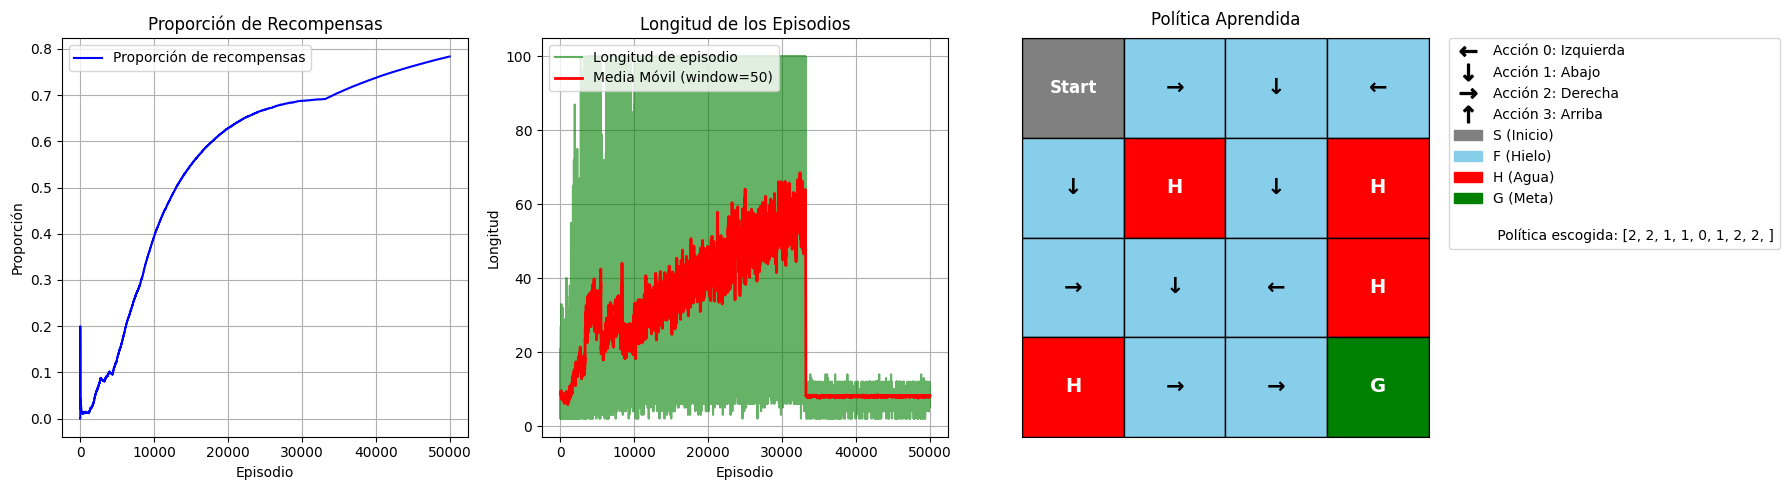

In [21]:
plot_all_three(
    list_stats = stats_mc_off_policy4x4,
    episode_lengths = episode_lengths_mc_off_policy4x4,
    Q = Q_mc_off_policy4x4,
    env = env_mc_off_policy4x4,
    actions = actions_mc_off_policy4x4,
    window=50
)

- En la **gr√°fica de la izquierda**, se observa la **proporci√≥n de recompensas** obtenidas por episodio, mostrando un incremento progresivo a lo largo del entrenamiento. Este comportamiento indica que el agente **aprende a maximizar sus recompensas** de forma cada vez m√°s consistente, lo que sugiere una **mejora continua** en su desempe√±o.

- En la **gr√°fica central**, se presenta la **longitud de los episodios**. Inicialmente, la duraci√≥n de los episodios exhibe una gran variabilidad y, con frecuencia, es elevada (el agente necesita m√°s pasos para concluir). Sin embargo, con el avance del entrenamiento se aprecia una **reducci√≥n y estabilizaci√≥n** de la longitud de los episodios, confirmada por la curva roja de media m√≥vil. Este resultado refleja que el agente **gana eficiencia** al resolver el entorno, tardando cada vez menos pasos en alcanzar un estado terminal.

- En la **gr√°fica de la derecha**, se muestra la **pol√≠tica aprendida** sobre el tablero de *FrozenLake*. Cada casilla de tipo ‚ÄúF‚Äù (hielo seguro) incluye una flecha que se√±ala la **acci√≥n √≥ptima** seleccionada por el agente. Las celdas ‚ÄúH‚Äù (hoyo/agua) y ‚ÄúG‚Äù (meta) se se√±alan en rojo y verde, respectivamente, para resaltar que son estados terminales. El diagrama deja ver que el agente **evita sistem√°ticamente** los hoyos y traza un **camino efectivo** hacia la meta, cumpliendo as√≠ su objetivo de maximizar recompensas y minimizar riesgos.

En conjunto, estos tres gr√°ficos evidencian que:
1. El agente **incrementa** su rendimiento (proporci√≥n de recompensas) de manera sostenida.  
2. La **longitud de los episodios** se **reduce** con el entrenamiento, denotando un **aumento en la eficiencia** de sus decisiones.  
3. La **pol√≠tica final** logra **esquivar** los hoyos y **llegar** a la meta de manera consistente.

En conclusi√≥n, el agente ha **conseguido** una estrategia s√≥lida para afrontar el desaf√≠o de *FrozenLake*, **maximizando** las recompensas obtenidas y **minimizando** la cantidad de pasos necesarios para completar cada episodio.

### 3.3 SARSA

SARSA (State-Action-Reward-State-Action) se caracteriza por actualizar la funci√≥n de valor de estado-acci√≥n $Q(s,a)$ en cada paso del episodio, utilizando la siguiente ecuaci√≥n base:

$$
Q(s,a) \leftarrow Q(s,a) + \alpha \left[ R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s,a) \right]
$$

donde:

- $s$ y $a$ son el estado y la acci√≥n actuales,
- $R_{t+1}$ es la recompensa obtenida tras ejecutar $a$,
- $s_{t+1}$ y $a_{t+1}$ son el estado y la acci√≥n siguientes,
- $\alpha$ es la tasa de aprendizaje,
- $\gamma$ es el factor de descuento.

A diferencia de **Q-Learning**, que usa la mejor acci√≥n posible en el estado siguiente ($\max_{a'} Q(s_{t+1}, a')$) para actualizar $Q$, **SARSA** emplea la acci√≥n real que se va a tomar ($a_{t+1}$), siguiendo la misma pol√≠tica que genera los datos.

**Caracter√≠sticas Clave de SARSA**

- On-Policy:
La misma pol√≠tica ($\epsilon$-greedy) se usa para explorar (generar la acci√≥n $a_{t+1}$) y para actualizar la Q-table.

- Actualizaci√≥n Paso a Paso (TD(0)):
El agente no espera a que finalice el episodio; tras cada transici√≥n $(s,a,r,s')$, se selecciona $a'$ y se actualiza $Q(s,a)$ en funci√≥n de $Q(s',a')$.

- Equilibrio entre Exploraci√≥n y Explotaci√≥n:
Con $\epsilon$-greedy, el agente explora con probabilidad $\epsilon$ y explota (selecciona la mejor acci√≥n) con probabilidad $1-\epsilon$.

#### 3.3.1 Mapa 4x4

**Implementaci√≥n**  

En el archivo ``sarsa.py``, hemos implementado la clase SARSA que extiende de Agente.

- `exploration_rate` ($\epsilon$):
Controla la probabilidad de explorar.  
Con valor 0.9, significa que, inicialmente, el agente elegir√° una acci√≥n aleatoria el 90% de las veces y la mejor acci√≥n el 10% de las veces.  
A medida que el agente aprende, este valor puede decaer para favorecer la explotaci√≥n de lo aprendido.

- `discount_rate` ($\gamma$):
Es el factor de descuento para las recompensas futuras.  
Un valor cercano a 1.0 indica que el agente tiene en cuenta casi en su totalidad las recompensas lejanas en el tiempo.

- `learning_rate` ($\alpha$):
Determina cu√°nto se ajusta la Q-table en cada actualizaci√≥n.  
Un valor de 0.1 significa que, en cada paso, el agente corrige su estimaci√≥n de $Q(s,a)$ en un 10% de la diferencia entre la estimaci√≥n actual y la nueva informaci√≥n recibida.

- `exploration_decay_rate`:
Es la tasa de decaimiento de la probabilidad de exploraci√≥n ($\epsilon$).  
Cuanto mayor sea este valor, m√°s r√°pidamente se reducir√° la probabilidad de que el agente tome acciones aleatorias, enfoc√°ndose cada vez m√°s en la acci√≥n √≥ptima seg√∫n la Q-table.

- `min_exploration_rate`:
Es el l√≠mite inferior de la tasa de exploraci√≥n.  
Evita que $\epsilon$ se vuelva tan peque√±o que el agente deje de explorar por completo. Con 0.01, se garantiza al menos un 1% de probabilidad de explorar incluso en etapas avanzadas del entrenamiento.

- `seed`:
Semilla para la reproducibilidad de resultados.  
Asegura que, usando el mismo valor, se obtenga el mismo comportamiento aleatorio (mismas acciones exploratorias) en sucesivas ejecuciones, facilitando la comparaci√≥n de experimentos.


In [22]:
# Establecer semilla para reproducibilidad
seed_value = 1995
np.random.seed(seed_value)
random.seed(seed_value)

# Definir los hiperpar√°metros
hiperparametros_sarsa = {
    "exploration_rate": 0.9,
    "discount_rate": 0.99,
    "learning_rate": 0.1,
    "exploration_decay_rate": 0.001,
    "min_exploration_rate": 0.01,
    "seed": 1995
}

Despu√©s, se crea un entorno FrozenLake 4x4 sin deslizamiento (``is_slippery=False``) se le pasan estos parametros e pasa todo esto al constructor de Agente para configurar la semilla, la Q-table y los dem√°s elementos para su correcto funcionamiento.

In [23]:
# Creaci√≥n del entorno
env_sarsa = gym.make("FrozenLake-v1", is_slippery=False, map_name="4x4", render_mode="ansi")

# Crear el agente SARSA
agente_sarsa = SARSA(env_sarsa, hiperparametros_sarsa)

Conitnuamos con el entrenamiento.

In [24]:
Q_sarsa, stats_sarsa, episode_lengths_sarsa = agente_sarsa.entrenar(num_episodios=50000)

Entrenando: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50000/50000 [00:16<00:00, 2993.53episodio/s]


**Evaluaci√≥n de la pol√≠tica aprendida**

Una vez entrenado el agente, se eval√∫a la pol√≠tica objetivo con `pi_star_from_sarsa`. Esta funci√≥n recorre el entorno seleccionando en cada estado la acci√≥n greedy seg√∫n $Q$.  

Devuelve:  

- `pi_star_sarsa`: Matriz que indica la acci√≥n √≥ptima en cada estado.  
- `actions_sarsa`: Cadena con la secuencia de acciones (0= izquierda, 1= abajo, 2= derecha, 3= arriba) que lleva al agente desde la posici√≥n inicial hasta la meta (o hasta caer en un agujero).


In [25]:
pi_star_sarsa, actions_sarsa = pi_star_from_Q(env_sarsa, Q_sarsa)

**Conclusi√≥n**

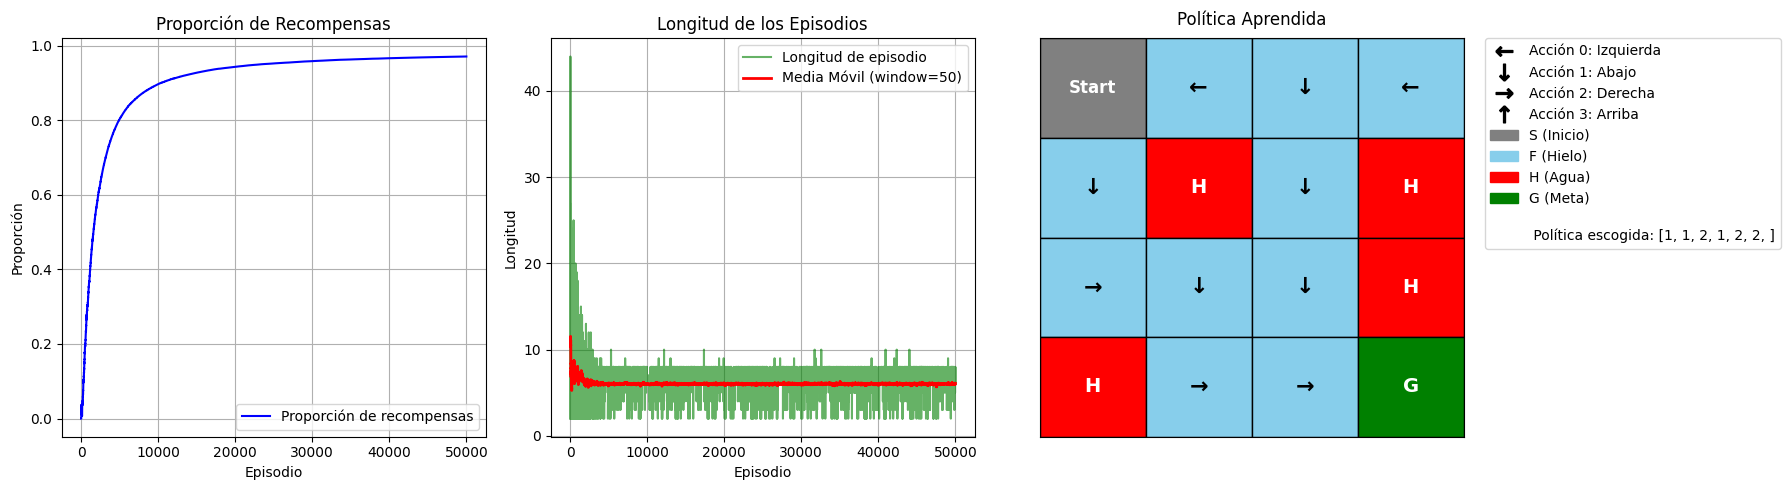

In [26]:
plot_all_three(
    list_stats=stats_sarsa,
    episode_lengths=episode_lengths_sarsa,
    Q=Q_sarsa,
    env=env_sarsa,
    actions=actions_sarsa,
    window=50  # O el valor que quieras
)

- En la **gr√°fica de la izquierda**, se aprecia la **proporci√≥n de recompensas** obtenidas por episodio, con una **r√°pida convergencia** hacia valores cercanos al m√°ximo. Esto indica que el agente **aprende de forma acelerada** a obtener recompensas y a resolver el entorno de manera efectiva.

- En la **gr√°fica central**, se muestra la **longitud de los episodios**, junto con una **media m√≥vil** para facilitar la observaci√≥n de la tendencia. Se ve que, al inicio, la duraci√≥n de los episodios es **altamente variable** y, con frecuencia, elevada. Sin embargo, conforme avanza el entrenamiento, la longitud se **reduce** de forma considerable y se **estabiliza** en valores bajos. Esto evidencia que el agente **descubre** un camino m√°s eficiente para llegar a la meta, necesitando menos pasos para completar cada episodio.

- En la **gr√°fica de la derecha**, se ilustra la **pol√≠tica aprendida** en el tablero de *FrozenLake*. Las celdas ‚ÄúF‚Äù (hielo seguro) contienen **flechas** que indican la **acci√≥n √≥ptima**; las celdas ‚ÄúH‚Äù (hoyo/agua) y ‚ÄúG‚Äù (meta) se colorean en rojo y verde, respectivamente, para recalcar que son estados terminales. El diagrama revela que la pol√≠tica **evita** los hoyos y traza un **camino eficaz** hacia la meta.  

En conjunto, los tres gr√°ficos muestran que:
1. El **rendimiento** (proporci√≥n de recompensas) **alcanza** r√°pidamente niveles cercanos al √≥ptimo.  
2. La **longitud de los episodios** se **reduce** de manera sustancial, demostrando **mayor eficiencia** en la resoluci√≥n del entorno.  
3. La **pol√≠tica final** permite al agente **evitar** sistem√°ticamente los hoyos y **llegar** a la meta con un **n√∫mero m√≠nimo de pasos**.  

Estos resultados evidencian que el agente ha logrado **aprender** una estrategia s√≥lida y **convergido** satisfactoriamente al reto de *FrozenLake*.

### 3.4 Q_Learning

Q-Learning es un m√©todo de aprendizaje temporal-diferido (TD) que permite al agente aprender la funci√≥n de valor de estado-acci√≥n $Q(s,a)$ sin requerir una pol√≠tica espec√≠fica para generar los datos (por ello, se considera un m√©todo Off-Policy). A diferencia de SARSA, donde se utiliza la acci√≥n efectivamente seleccionada ($a_{t+1}$), en Q-Learning se actualiza $Q(s,a)$ bas√°ndose en la mejor acci√≥n posible en el estado siguiente:

$$
\max_{a'} Q(s', a')
$$

independientemente de la acci√≥n que realmente se elija para la exploraci√≥n.

- Ecuaci√≥n de Actualizaci√≥n de Q-Learning

En cada paso, tras observar la transici√≥n $(s,a,r,s')$, se aplica:

$$
Q(s,a) \leftarrow Q(s,a) + \alpha \left[ r + \gamma \max_{a'} Q(s',a') - Q(s,a) \right]
$$

donde:

- $s$, $a$ son el estado y la acci√≥n antes de la transici√≥n.
- $r$ es la recompensa inmediata.
- $s'$ es el nuevo estado tras ejecutar la acci√≥n $a$.
- $\max_{a'} Q(s', a')$ denota el mejor valor de acci√≥n en el estado siguiente (vista Off-Policy).
- $\alpha$ es la tasa de aprendizaje.
- $\gamma$ es el factor de descuento.

Con este enfoque, la actualizaci√≥n de $Q$ no depende de la acci√≥n que se tome realmente en $s'$ para explorar, sino que asume que se elegir√° la acci√≥n √≥ptima. Por ello, Q-Learning converge a la pol√≠tica √≥ptima si se exploran suficientemente todos los estados y acciones (por ejemplo, usando $\epsilon$-greedy con decaimiento de $\epsilon$).


#### 3.4.1 Mapa 4x4

**Implementaci√≥n**

Comenzamos seleccionando una semilla para la repetibilidad del ejercicio y seleccionamos los hiperpar√°metros con los que vamos a trabajar.

- **``learning_rate ($\alpha$)``**

    Controla la velocidad a la que se actualizan los valores $Q(s,a)$.
    - Un valor alto ($\alpha \approx 1$) hace que el agente se adapte muy r√°pido a la nueva informaci√≥n, pero puede ser inestable.
    - Un valor bajo ($\alpha \approx 0$) hace que el agente aprenda de forma m√°s lenta y conservadora.

- **``discount_rate ($\gamma$)``**

    Factor de descuento que pondera la importancia de las recompensas futuras.
    - Un valor cercano a 1 ($\gamma \approx 1$) indica que el agente considera fuertemente las recompensas lejanas.
    - Un valor cercano a 0 ($\gamma \approx 0$) hace que el agente se centre casi exclusivamente en la recompensa inmediata.

- **``exploration_rate ($\epsilon$)``**

    Probabilidad de que el agente elija una acci√≥n aleatoria (exploraci√≥n) en lugar de la acci√≥n con mejor valor $Q$ (explotaci√≥n).
    - Un valor alto ($\epsilon \approx 1$) implica mucha exploraci√≥n; un valor bajo ($\epsilon \approx 0$) favorece la explotaci√≥n.

- **``exploration_decay_rate``**

    Tasa a la que $\epsilon$ disminuye a lo largo de los episodios.
    - Cuanto mayor sea, m√°s r√°pido se reduce la exploraci√≥n y se potencia la explotaci√≥n de la pol√≠tica aprendida.
    - 'min_exploration_rate'

- **``L√≠mite inferior para $\epsilon$.``**
    - Garantiza que el agente mantenga cierta probabilidad de explorar incluso en fases avanzadas del entrenamiento, evitando que $\epsilon$ llegue a 0.

- **``seed``**
    - Asegura que los elementos aleatorios (acciones, inicializaciones) puedan replicarse en sucesivas ejecuciones, permitiendo comparar resultados de forma consistente.


In [27]:
# Establecer semilla para reproducibilidad
seed_value = 1995
np.random.seed(seed_value)
random.seed(seed_value)

# Par√°metros para el agente
hiperparametros_ql = {
    'learning_rate': 0.1,
    'discount_rate': 0.99,
    'exploration_rate': 1.0,
    'exploration_decay_rate': 0.001,
    'min_exploration_rate': 0.01,
    'seed': seed_value  # Pasamos la semilla al agente
}

Luego, creamos el entorno, realizamos la creaci√≥n del agente y comenzamos con el entrenamiento

In [28]:
env_ql = gym.make("FrozenLake-v1", is_slippery=False, map_name="4x4", render_mode="ansi")
env_ql.reset(seed=seed_value)
agente_ql = QLearning(env_ql, hiperparametros_ql)
Q_ql, stats_ql, episode_lengths_ql = agente_ql.entrenar(num_episodios=50000)

Entrenando: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 50000/50000 [00:14<00:00, 3440.50episodio/s]


**Evaluaci√≥n de la pol√≠tica aprendida**

Una vez entrenado el agente, se eval√∫a la pol√≠tica objetivo con `pi_star_from_Q`. Esta funci√≥n recorre el entorno seleccionando en cada estado la acci√≥n greedy seg√∫n $Q$.  

Devuelve:  

- `pi_ql`: Matriz que indica la acci√≥n √≥ptima en cada estado.  
- `actions_ql`: Cadena con la secuencia de acciones (0= izquierda, 1= abajo, 2= derecha, 3= arriba) que lleva al agente desde la posici√≥n inicial hasta la meta (o hasta caer en un agujero).


In [29]:

pi_star_ql, actions_ql = pi_star_from_Q(env_ql, Q_ql)


**Conclusi√≥n**

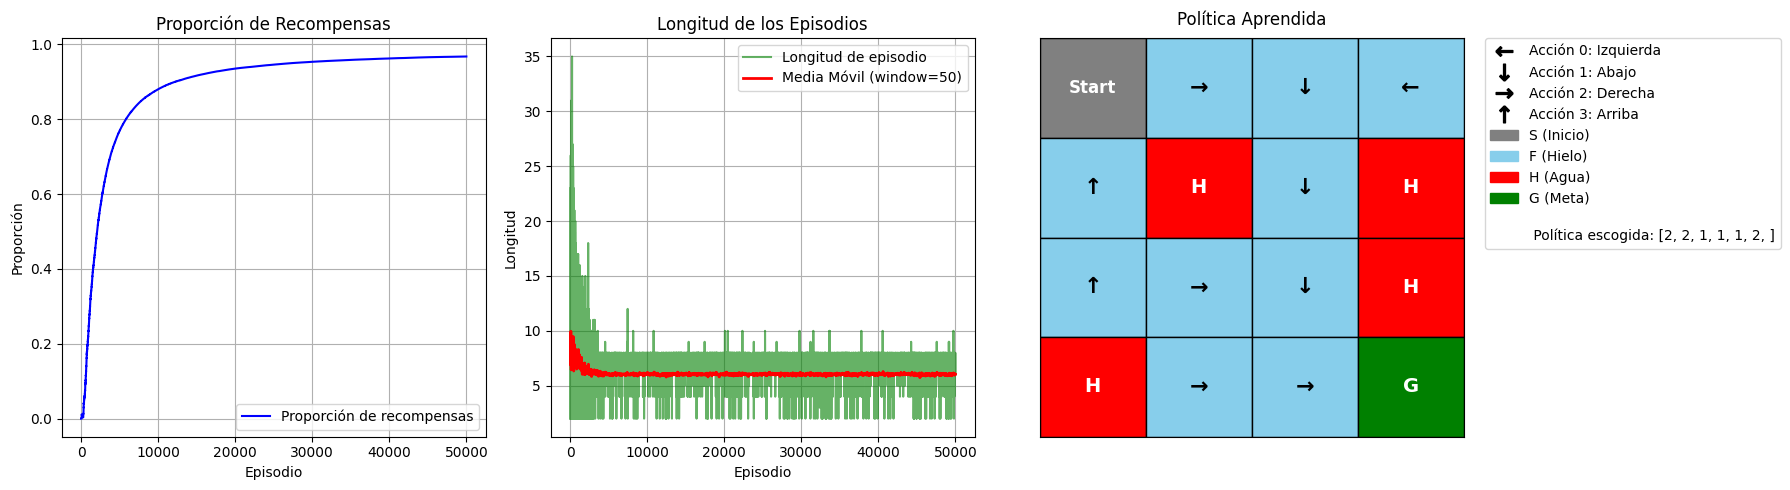

In [30]:
plot_all_three(
    list_stats=stats_ql,
    episode_lengths=episode_lengths_ql,
    Q=Q_ql,
    env=env_ql,
    actions=actions_ql,
    window=50  # O el valor que quieras
)

- En la **gr√°fica de la izquierda**, la **proporci√≥n de recompensas** por episodio crece de manera **r√°pida** y se acerca a un valor muy alto, lo que indica que el agente **aprende con eficacia** a maximizar sus recompensas. Esta tendencia ascendente sugiere que la pol√≠tica aprendida es cada vez m√°s **efectiva** para alcanzar la meta y evitar los agujeros.

- En la **gr√°fica central**, se muestra la **longitud de los episodios**, junto con una **media m√≥vil** que suaviza la curva. Se ve que, tras un periodo inicial de alta variabilidad, la longitud de los episodios **disminuye** de manera notable y se **estabiliza**. Este resultado confirma que el agente **descubre** progresivamente estrategias m√°s eficientes para resolver el entorno, necesitando menos pasos para llegar a un estado terminal.

- En la **gr√°fica de la derecha** ilustra la **pol√≠tica aprendida** en el tablero de *FrozenLake*. Cada celda de tipo ‚ÄúF‚Äù (hielo seguro) incluye una **flecha** que marca la **acci√≥n √≥ptima**. Las celdas ‚ÄúH‚Äù (hoyo/agua) y ‚ÄúG‚Äù (meta) se representan en rojo y verde, respectivamente, indicando que son estados terminales. El diagrama revela que la pol√≠tica final **evita** sistem√°ticamente los hoyos y traza un **camino efectivo** hacia la meta.

En conjunto, estos tres gr√°ficos evidencian que:

1. El agente **alcanza** r√°pidamente un **alto rendimiento** (proporci√≥n de recompensas).  
2. La **longitud de los episodios** se **reduce** y se estabiliza, reflejando **mayor eficiencia** en la toma de decisiones.  
3. La **pol√≠tica final** esquiva los hoyos y dirige al agente hacia la meta, confirmando una **estrategia s√≥lida** para completar FrozenLake.

## **4. Conclusi√≥n**

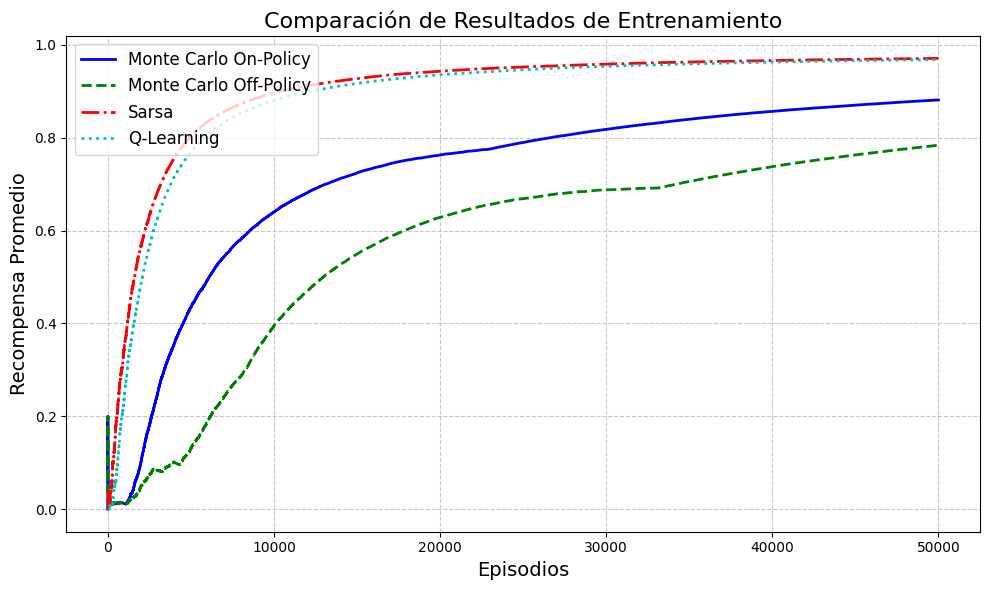

In [31]:
plot_comparison(stats_list=[stats_mc_on_policy,stats_mc_off_policy4x4,stats_sarsa,stats_ql], labels=["Monte Carlo On-Policy", "Monte Carlo Off-Policy", "Sarsa","Q-Learning"])

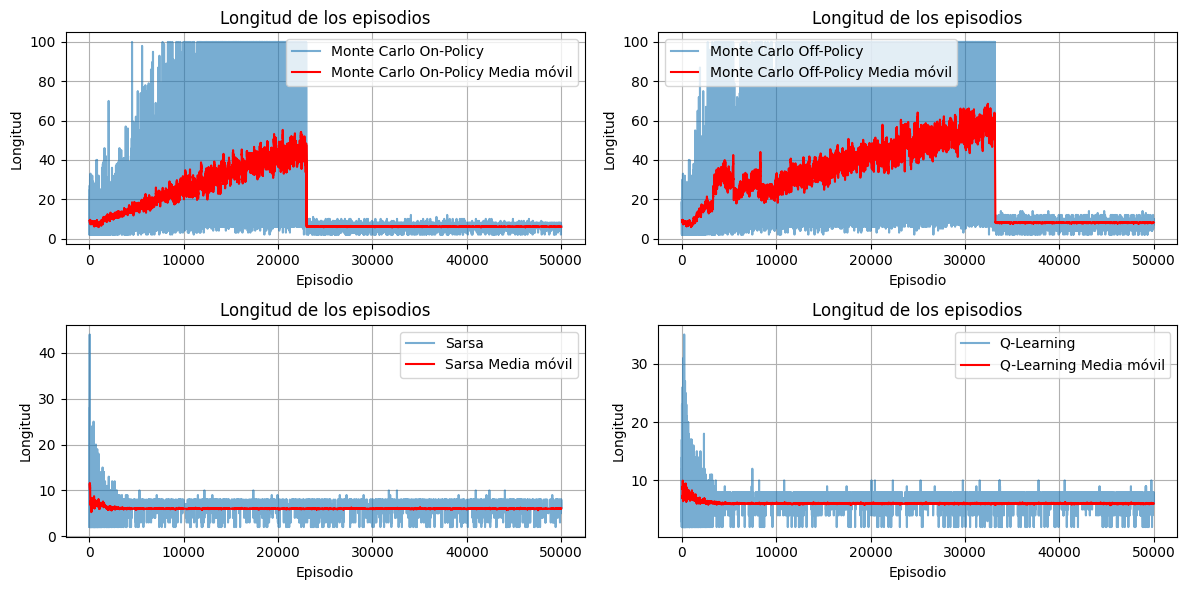

In [32]:
plot_multiple_episode_lengths(
    [episode_lengths_mc_on_policy, episode_lengths_mc_off_policy4x4,
     episode_lengths_sarsa, episode_lengths_ql],
    labels=["Monte Carlo On-Policy", "Monte Carlo Off-Policy", "Sarsa", "Q-Learning"])

Al analizar las recompensas promedio, se aprecia que todos los algoritmos logran mejorar su desempe√±o a lo largo del entrenamiento, aunque difieren en la rapidez con la que convergen. **Monte Carlo On-Policy** y **Monte Carlo Off-Policy** muestran un crecimiento m√°s lento y una mayor variabilidad en las etapas iniciales, lo que indica que requieren m√°s episodios para consolidar una pol√≠tica estable. Por el contrario, **Sarsa** y **Q-Learning** incrementan sus recompensas de forma m√°s acelerada, evidenciando una capacidad de aprendizaje m√°s estable desde los primeros miles de episodios.

En cuanto a la **longitud de los episodios**, se observa que **Sarsa** logra una reducci√≥n notablemente r√°pida y se mantiene en valores bajos de manera sostenida, lo que sugiere que el agente encuentra rutas eficientes hacia la meta y permanece en ellas de forma confiable. **Q-Learning**, por su parte, tambi√©n alcanza episodios cortos, pero experimenta picos ocasionales que pueden prolongar algunos recorridos, reflejando cierta inestabilidad en su pol√≠tica en momentos puntuales.

Si bien todos los algoritmos terminan resolviendo el entorno y alcanzando recompensas cercanas a 1, **Sarsa** destaca por su **consistencia** y **estabilidad**. Al mantener episodios breves y recompensas altas de manera m√°s uniforme, el agente demuestra un aprendizaje s√≥lido y menos propenso a altibajos. **Q-Learning** es muy competitivo y tambi√©n alcanza un rendimiento sobresaliente, pero sus fluctuaciones indican que, en ocasiones, tarda un poco m√°s en recuperar una pol√≠tica √≥ptima cuando se aleja de ella.

En conjunto, tanto **Sarsa** como **Q-Learning** son excelentes opciones para este entorno, ofreciendo un aprendizaje r√°pido y resultados satisfactorios. Sin embargo, el comportamiento m√°s regular de Sarsa le otorga una **ligera ventaja** en t√©rminos de estabilidad, posicion√°ndolo como el mejor algoritmo en este experimento.